# Working with Matrices and Tensors useful for PyTorch
Date: 2019-08-26  
Author: Jason Beach  
Categories: Introduction_Tutorial, Data_Science  
Tags: numpy, pytorch, python, deeplearning  
<!--eofm-->

The Artificial Intelligence field is moving from single-function libraries to frameworks for building different network models.  TensorFlow was one of the first, and has strong production capabilities, such as process optimizations.  However, its syntax is unintuitive, and the library has a reputation for being difficult for testing new models.  This led to many organizations adopting PyTorch, with underlying Numpy, for designing network models.  This post describes the basic data structures for working with Matrices and Tensors in PyTorch.

## Prerequisites: plotting

Using examples from [tutorial](https://github.com/akhilvasvani/Linear-Algebra-Basics/blob/master/Chapters/2.06%20Special%20Kinds%20of%20Matrices%20and%20Vectors/2.6%20Special%20Kinds%20of%20Matrices%20and%20Vectors.ipynb)

#### Quiver vector plots

* [ref: quiver plots](https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.15-Quiver-and-Stream-Plots/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


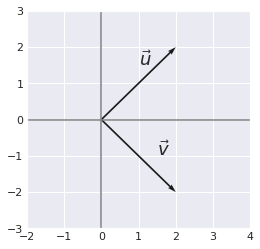

In [3]:
x = [0,0,2,2]
y = [0,0,2,-2]

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(1, 1.5, r'$\vec{u}$', size=18)
plt.text(1.5, -1, r'$\vec{v}$', size=18)

plt.show()
plt.close()

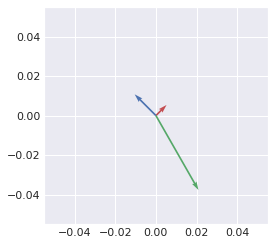

In [4]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[1,1],[-2,2],[4,-7]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

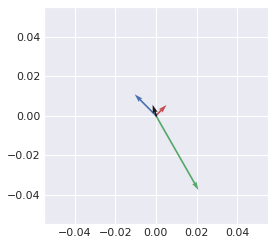

In [5]:
plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
v12 = V[0] + V[1] # adding up the 1st (red) and 2nd (blue) vectors
plt.quiver(*origin, v12[0], v12[1])
plt.show()

#### mPlot3d 3-dim vector plots

* [ref: tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

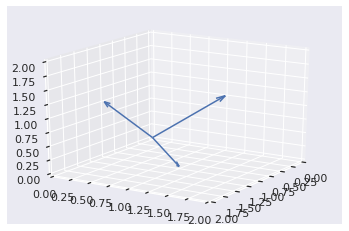

In [64]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(0,2)
ax.view_init(elev=20., azim=32)

# Make a 3D quiver plot
x, y, z = np.zeros((3,3))
u, v, w = np.array([[1,1,0],[1,0,1],[0,1,1]])

ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.1)
plt.show()

<hr>

In [22]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'd774f565b',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/opt/conda/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.4.0',
 'os_name': 'posix',
 'platform': 'Linux-4.9.184-linuxkit-x86_64-with-debian-buster-sid',
 'sys_executable': '/opt/conda/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.7.3 | packaged by conda-forge | (default, Jul  1 2019, '
                '21:52:21) \n'
                '[GCC 7.3.0]'}


In [23]:
#makes `plt.show() unnecessary
%matplotlib inline  
#interactive mode, allows click and drag to change the viewpoint
#does not work with jupyterlab
#%matplotlib notebook    

In [36]:
#ref: customizations; https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams["figure.figsize"] = 6, 4

In [37]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

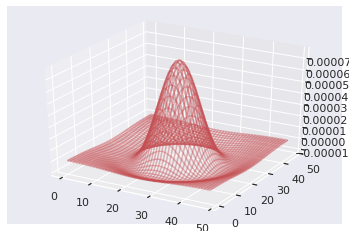

In [48]:
import numpy as np

def LoG(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

N = 49
half_N = N // 2
X2, Y2 = np.meshgrid(range(N), range(N))
Z2 = -LoG(X2 - half_N, Y2 - half_N, sigma=8)
X1 = np.reshape(X2, -1)
Y1 = np.reshape(Y2, -1)
Z1 = np.reshape(Z2, -1)

#wireframe
ax = plt.axes(projection='3d')
ax.plot_wireframe(X2, Y2, Z2, color='r', alpha=0.4)

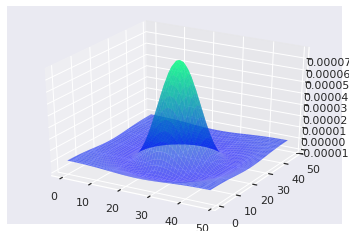

In [52]:
#suface
ax = plt.axes(projection='3d')
ax.plot_surface(X2, Y2, Z2, rstride=1, cstride=1,
                cmap='winter', edgecolor='none', alpha=0.6)
#ax.set_title('surface');

## Basics of Tensors and Matrices


### Basic terminology

* [ref: stackexchange](https://math.stackexchange.com/questions/412423/what-are-the-differences-between-a-matrix-and-a-tensor)

A scalar is a single number.

A vector is just one row or column.

A matrix is just a 2-D grid of numbers.

A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector is actually such a tensor), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.

A tensor is a mathematical entity that lives in a structure and interacts with other mathematical entities. If one transforms the other entities in the structure in a regular way, then the tensor must obey a related transformation rule.

This “dynamical” property of a tensor is the key that distinguishes it from a mere matrix. It’s a team player whose numerical values shift around along with those of its teammates when a transformation is introduced that affects all of them.  

Any rank-2 tensor can be represented as a matrix, but not every matrix is really a rank-2 tensor. The numerical values of a tensor’s matrix representation depend on what transformation rules have been applied to the entire system.

Indeed, speaking of a rank-2 tensor is not really accurate. The rank of a tensor has to be given by two numbers. The vector to vector mapping is given by a rank-(1,1) tensor, while the quadratic form is given by a rank-(0,2) tensor. There's also the type (2,0) which also corresponds to a matrix, but which maps two covectors to a number, and which again transforms differently.

So, succinctly, a tensor is different from a matrix in that a tensor can be:

* rank (dimension) greater than 2
* part of a system, such as a neural network, that accounts for inter-related entities
* dynamic, such that, just as a random variable X can have an actualized value, x, a tensor can be a container for actualized values of an array 

The bottom line of this is:

* components of a rank-2 tensor can be written in a matrix.
* the tensor is not that matrix, because different types of tensors can correspond to the same matrix.
* the differences between those tensor types are uncovered by the basis transformations (hence the physicist's definition: "A tensor is what transforms like a tensor").

### The need for the Tensor construct

You can specify a linear transformation 𝑎 between vectors by a matrix. Let's call that matrix 𝐴. Now if you do a basis transformation, this can also be written as a linear transformation, so that if the vector in the old basis is 𝑣, the vector in the new basis is $T^{-1}𝑣$ (where v is a column vector). Now you can ask what matrix describes the transformation 𝑎 in the new basis. Well, it's the matrix $T^{-1}AT$.

Well, so far, so good. What I memorized back then is that under basis change a matrix transforms as $T^{-1}AT$.

But then, we learned about quadratic forms. Those are calculated using a matrix 𝐴 as $u^TAv$. Still no problem, until we learned about how to do basis changes. Now, suddenly the matrix did not transform as $T^{-1}AT$, but rather as $T^TAT$. Which confused me like hell: How could one and the same object transform differently when used in different contexts?

Well, the solution is: Because we are actually talking about different objects! In the first case, we are talking about a tensor which takes vectors to vectors. In the second case, we are talking about a tensor which takes two vectors into a scalar, or equivalently, which takes a vector to a covector.

Proof basis change rule for quadratic form, with 𝑃 being the change of basis matrix between 𝑥,𝑦,𝑧 and 𝑢,𝑣,𝑤

\begin{align}q&= \begin{bmatrix}x&y&z\end{bmatrix}\begin{bmatrix}\text A\end{bmatrix}\begin{bmatrix}x\\y\\z\end{bmatrix}\\ &=\begin{bmatrix}x\\y\\z\end{bmatrix}^\top\begin{bmatrix}\text A\end{bmatrix}\begin{bmatrix}x\\y\\z\end{bmatrix}\\ &=\left(P\begin{bmatrix}u\\v\\w\end{bmatrix}\right)^\top \begin{bmatrix}\text A\end{bmatrix}P\begin{bmatrix}u\\v\\w\end{bmatrix}\\ &=\begin{bmatrix}u&v&w\end{bmatrix}P^\top\begin{bmatrix}\text A\end{bmatrix}P\begin{bmatrix}u\\v\\w\end{bmatrix} \end{align}

## Basics of PyTorch and Numpy

PyTorch is 'A replacement for NumPy to use the power of GPUs.'  PyTorch provides both matrices and tensors.

### Configure environment

In [39]:
import torch
import numpy as np

### Creation

#### Numpy

At the core, numpy provides the excellent ndarray objects, short for n-dimensional arrays.

In a ‘ndarray’ object, aka ‘array’, you can store multiple items of the same data type. It is the facilities around the array object that makes numpy so convenient for performing math and data manipulations.

* arrays are designed to handle vectorized operations while a python list is not.
* array size cannot be increase (unlike list), so a new array must be created
* array size is much less than list
* an array must have all items to be of the same data type, unlike lists.

In [67]:
list1 = [0,1,2,3,4]
arr1d = np.array(list1)

try:
    list1 + 2
except:
    print("lack of vectorization on base lists makes this operation impossible")
    
print( arr1d + 2 )

lack of vectorization makes this impossible


array([2, 3, 4, 5, 6])

In [ ]:
The most commonly used numpy dtypes are: 'float', 'int', 'bool', 'str' and 'object'

In [94]:
# Create a 2d array from a list of lists
list2 = [[0,1,2], [3,4,5], [6,7,8]]
arr2d = np.array(list2, dtype='float')
arr2d

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [70]:
arr2d.astype('str')

array([['0.0', '1.0', '2.0'],
       ['3.0', '4.0', '5.0'],
       ['6.0', '7.0', '8.0']], dtype='<U32')

In [72]:
arr2d.tolist()

[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]]

In [74]:
# memory address
print('Memory: ', arr2d.data)
# shape
print('Shape: ', arr2d.shape)
# dtype
print('Datatype: ', arr2d.dtype)
# size
print('Size: ', arr2d.size)
# ndim
print('Num Dimensions: ', arr2d.ndim)

Shape:  (3, 3)
Datatype:  float64
Size:  9
Num Dimensions:  2


In [131]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [126]:
np.concatenate(arr2d)

array([ 0.,  1.,  2.,  3., -1., -1.,  6.,  7.,  8.])

In [137]:
arr2d.T

array([[ 0.,  3.,  6.],
       [ 1., -1.,  7.],
       [ 2., -1.,  8.]])

In [140]:
linalg.inv(arr2d)

array([[-0.04166667,  0.25      ,  0.04166667],
       [-1.25      , -0.5       ,  0.25      ],
       [ 1.125     ,  0.25      , -0.125     ]])

In [142]:
linalg.norm(arr2d)

linalg.det(arr2d)

24.000000000000004

In [78]:
#slicing
arr2d[:2,:2]

array([[0., 1.],
       [3., 4.]])

In [77]:
#boolean indexing
arr2d > 4

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [79]:
#reverse the array on one dimen (rows)
arr2d[::-1,]

array([[6., 7., 8.],
       [3., 4., 5.],
       [0., 1., 2.]])

In [95]:
#deep copy of array
tmp = arr2d.copy()

#NaN or Infinity
arr2d[1,1] = np.nan  # not a number
arr2d[1,2] = np.inf  # infinite
print( arr2d )
print()

# Replace nan and inf with -1. Don't use arr2 == np.nan
missing_bool = np.isnan(arr2d) | np.isinf(arr2d)
arr2d[missing_bool] = -1  
print( arr2d )
print()

print( tmp )

[[ 0.  1.  2.]
 [ 3. nan inf]
 [ 6.  7.  8.]]

[[ 0.  1.  2.]
 [ 3. -1. -1.]
 [ 6.  7.  8.]]

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [106]:
#reshape
print( (arr2d.reshape(9, 1)).transpose())

#flatten
print( arr2d.flatten())

#ravel - new array is reference to the parent array, no copy()
print( arr2d.ravel())

[[ 0.  1.  2.  3. -1. -1.  6.  7.  8.]]
[ 0.  1.  2.  3. -1. -1.  6.  7.  8.]
[ 0.  1.  2.  3. -1. -1.  6.  7.  8.]


In [108]:
# Lower limit is 0 be default
print(np.arange(5))  

# 0 to 9
print(np.arange(0, 10))  

# 0 to 9 with step of 2
print(np.arange(0, 10, 2))  

# 10 to 1, decreasing order
print(np.arange(10, 0, -1))

# Exactly 10 numbers, Start at 1 and end at 50 (not equally spaced because of the int rounding)
print( np.linspace(start=1, stop=50, num=10, dtype=int))


# LogSpace - start value is actually base^start and ends with base^stop (default base 10)
# Limit the number of digits after the decimal to 2
np.set_printoptions(precision=2)  
# Start at 10^1 and end at 10^50
print( np.logspace(start=1, stop=50, num=10, base=10)) 

[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[10  9  8  7  6  5  4  3  2  1]
[ 1  6 11 17 22 28 33 39 44 50]


In [109]:
#zeros
print( np.zeros([2,2]))

#ones
print( np.ones([2,2]))

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]


In [110]:
a = [1,2,3] 
# Repeat whole of 'a' two times
print('Tile:   ', np.tile(a, 2))

# Repeat each element of 'a' two times
print('Repeat: ', np.repeat(a, 2))

Tile:    [1 2 3 1 2 3]
Repeat:  [1 1 2 2 3 3]


In [111]:
# Create random integers of size 10 between [0,10)
np.random.seed(100)
arr_rand = np.random.randint(0, 10, size=10)
print(arr_rand)

# Get the unique items and their counts
uniqs, counts = np.unique(arr_rand, return_counts=True)
print("Unique items : ", uniqs)
print("Counts       : ", counts)

[8 8 3 7 7 0 4 2 5 2]
Unique items :  [0 2 3 4 5 7 8]
Counts       :  [1 2 1 1 1 2 2]


A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.  When an uninitialized matrix is created, whatever values were in the allocated memory at the time will appear as the initial values.  `torch.Tensor` is an alias for the default tensor type (torch.FloatTensor).

In [25]:
x = torch.empty(5, 3)    #construct a 5x3 matrix, uninitialized
x = torch.rand(5, 3)     #randomly initialized matrix
x = torch.zeros(5, 3, dtype=torch.long)    #matrix filled zeros and of dtype long

In [26]:
type(x)

torch.Tensor

In [27]:
print( x.type() )

print( x.shape )
print( x.size() )
print( x.dim() )

torch.LongTensor
torch.Size([5, 3])
torch.Size([5, 3])
2


A tensor can be constructed from a Python list or sequence using the torch.tensor() constructor.  

`torch.tensor()` always copies data. If you have a Tensor data and just want to change its `requires_grad` flag, use `requires_grad_()` or `detach()` to avoid a copy. If you have a numpy array and want to avoid a copy, use `torch.as_tensor()`.

In [21]:
x = torch.tensor([5.5, 3])    #create a tensor from data

In [22]:
# create a tensor
new_tensor = torch.Tensor([[1, 2], [3, 4]])    # create a 2 x 3 tensor with random values
empty_tensor = torch.Tensor(2, 3)     # create a 2 x 3 tensor with random values between -1and 1
uniform_tensor = torch.Tensor(2, 3).uniform_(-1, 1)    # create a 2 x 3 tensor with random values from a uniform distribution on the interval [0, 1)
rand_tensor = torch.rand(2, 3)    # create a 2 x 3 tensor of zeros
zero_tensor = torch.zeros(2, 3)

### Slicing and reshaping

In [23]:
## slicing examples
slice_tensor = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])    # elements from every row, first column

In [24]:
print( slice_tensor[1][0] )
print( slice_tensor[1][0].item() )

tensor(4.)
4.0


In [58]:
print(slice_tensor[:, 0])         # tensor([ 1.,  4.,  7.])# elements from every row, last column
print(slice_tensor[:, -1])        # tensor([ 3.,  6.,  9.])# all elements on the second row
print(slice_tensor[2, :])         # tensor([ 4.,  5.,  6.])# all elements from first two rows
print(slice_tensor[:2, :])        # tensor([[ 1.,  2.,  3.],
                                  #         [ 4.,  5.,  6.]])

tensor([1., 4., 7.])
tensor([3., 6., 9.])
tensor([7., 8., 9.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [73]:
reshape_tensor = torch.Tensor([[1, 2], [3, 4]])

print( reshape_tensor.view(1,4) ) 
print( reshape_tensor.view(4,1) )

tensor([[1., 2., 3., 4.]])
tensor([[1.],
        [2.],
        [3.],
        [4.]])


In [28]:
my_tensor = torch.rand(2,3)
print(my_tensor)

tensor([[0.7329, 0.2473, 0.8068],
        [0.5935, 0.4460, 0.9787]])


### Operations

There are multiple syntaxes for operations.  Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.  The docs for all operations is [here](https://pytorch.org/docs/stable/torch.html).

In [29]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)   

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.2641,  0.1227,  0.8318],
        [-0.8145, -0.3912,  0.3452],
        [-0.9334, -1.3681,  0.3499],
        [-1.9163, -0.0799, -0.7764],
        [ 0.7414,  1.4728,  0.0776]])


In [30]:
y = torch.rand(5, 3)

In [31]:
#method
print(torch.add(x, y))

#output tensor as argument
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

#Addition: in-place
y.add_(x)
print(y)

tensor([[ 0.2509,  0.9078,  0.9634],
        [-0.5009,  0.2014,  0.7240],
        [-0.5479, -0.4745,  0.5204],
        [-1.4827,  0.4353, -0.4762],
        [ 1.0552,  1.4836,  0.3999]])
tensor([[ 0.2509,  0.9078,  0.9634],
        [-0.5009,  0.2014,  0.7240],
        [-0.5479, -0.4745,  0.5204],
        [-1.4827,  0.4353, -0.4762],
        [ 1.0552,  1.4836,  0.3999]])
tensor([[ 0.2509,  0.9078,  0.9634],
        [-0.5009,  0.2014,  0.7240],
        [-0.5479, -0.4745,  0.5204],
        [-1.4827,  0.4353, -0.4762],
        [ 1.0552,  1.4836,  0.3999]])


In [33]:
print( my_tensor.t() )             # regular transpose function
print( my_tensor.permute(-1,0) )   # transpose via permute function

tensor([[0.7329, 0.5935],
        [0.2473, 0.4460],
        [0.8068, 0.9787]])
tensor([[0.7329, 0.5935],
        [0.2473, 0.4460],
        [0.8068, 0.9787]])


In [34]:
cross_prod = my_tensor.cross(my_tensor)
print( cross_prod )

tensor([[ 4.3144e-09,  8.3869e-09,  3.0715e-09],
        [ 4.7199e-09,  6.7144e-09, -7.1207e-09]])


In [35]:
maxtrix_prod = my_tensor.mm( my_tensor.t() )
print( maxtrix_prod )

tensor([[1.2493, 1.3350],
        [1.3350, 1.5091]])


In [36]:
element_mult = my_tensor.mul(my_tensor)
print( element_mult )

tensor([[0.5371, 0.0612, 0.6510],
        [0.3523, 0.1989, 0.9579]])


### Working with Numpy and the GPU

In [41]:
if torch.cuda.is_available():
    my_tensor.cuda(True)

In [42]:
my_tensor.is_cuda

False

In [43]:
# Create a numpy array
x = np.array([[1, 2], [3, 4]])
print(x)

[[1 2]
 [3 4]]


In [44]:
# Convert the numpy array to a torch tensor
y = torch.from_numpy(x)
print(y)

tensor([[1, 2],
        [3, 4]])


In [45]:
# Convert the torch tensor to a numpy array
z = y.numpy()
print(z)

[[1 2]
 [3 4]]


### References: framemworks

__Numpy__

* [ref: datacamp numpy cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [docs: numpy quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)
* [docs: numpy api](https://docs.scipy.org/doc/numpy/reference/)


__PyTorch__

* [docs: pytorch cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html)
* [docs: pytorch api](https://pytorch.org/docs/stable/index.html)
* [ref: kdnuggets pytorch](https://www.kdnuggets.com/2019/08/pytorch-cheat-sheet-beginners.html)
* [ref: pytorch cheat](https://github.com/Tgaaly/pytorch-cheatsheet/blob/master/README.md)
* [ref: kaggle pytorch starter with helper functions](https://github.com/bfortuner/pytorch-kaggle-starter)

## References: matrices and tensors

_Tutorials_

* [linear algebra refresher for Deep Learning course](https://github.com/akhilvasvani/Linear-Algebra-Basics/tree/master/Chapters)
* [fastai linear algebra course](https://github.com/fastai/numerical-linear-algebra)

_Operations_

* [fundamental theorem](http://www.itshared.org/2015/06/the-fundamental-theorem-of-linear.html)
* [matrix multiplication](https://github.com/staltz/matrixmultiplication.xyz)
* [basic transformations](https://www.dhruvonmath.com/2018/12/31/matrices/)

_Transformations_

* [pca](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)
* [svd](https://jeremykun.com/2016/04/18/singular-value-decomposition-part-1-perspectives-on-linear-algebra/)
* [pca and svd](https://intoli.com/blog/pca-and-svd/)
* [non-negative factorization](https://www.math3ma.com/blog/matrices-probability-graphs)
* [qmf](https://engineering.quora.com/Open-sourcing-QMF-for-matrix-factorization?share=1https://www.learnenough.com/story?discount_code=launch)
* [eigenvectors](http://setosa.io/ev/eigenvectors-and-eigenvalues/)
* [change of basis](http://eli.thegreenplace.net/2015/change-of-basis-in-linear-algebra/)
* [kalman filter](http://www.bzarg.com/p/how-a-kalman-filter-works-in-pictures/)
* [kalman filters](http://www.anuncommonlab.com/articles/how-kalman-filters-work/)
* [einstein summation](https://obilaniu6266h16.wordpress.com/2016/02/04/einstein-summation-in-numpy/)
* [eigenvectors from eigenvalues](https://terrytao.wordpress.com/2019/08/13/eigenvectors-from-eigenvalues/)

_Algorithms_

* [numpy quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)
* [linear algebra with python](https://rlhick.people.wm.edu/stories/linear-algebra-python-basics.html)


* [basic algorithms](https://gab41.lab41.org/the-10-algorithms-machine-learning-engineers-need-to-know-f4bb63f5b2fa#.1lqjdwdad)
* [don't invert](https://jeremykun.com/2016/04/18/singular-value-decomposition-part-1-perspectives-on-linear-algebra/)
* [effecient multiplication](http://cognitivemedium.com/srs-mathematics)
* [hadoop](http://magpiehall.com/two-step-matrix-multiplication-with-hadoop/)
* [multicore multiplication](http://martin-thoma.com/part-iii-matrix-multiplication-on-multiple-cores-in-python-java-and-c/)
* [4-bit linear algebra](https://astojanov.github.io/projects/clover/)

_Machine Learning - focus_

* [needed for ml](http://cognitivemedium.com/srs-mathematics)


_Theory-focus_

* [essence of linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
* [nice questions to explore](http://cognitivemedium.com/srs-mathematics)
* [what matrices actually are](https://nolaymanleftbehind.wordpress.com/2011/07/10/linear-algebra-what-matrices-actually-are/)
* [matrices as tensors](https://www.math3ma.com/blog/matrices-as-tensor-network-diagrams)
* [seeing theory](https://seeing-theory.brown.edu/index.html)
* [illustrated theory](http://illustratedtheoryofnumbers.com/)
* [math to code](https://programmingzen.com/exploring-mathematics-with-matplotlib-and-python/)
* [visual information theory](https://colah.github.io/posts/2015-09-Visual-Information/)
* [basic probabilty](https://www.math3ma.com/blog/matrices-probability-graphs)
* [markov property](https://xaviergeerinck.com/markov-property-chain-reward-decision)
* [markov chains](https://astojanov.github.io/projects/clover/)
* [gaussian process](https://yugeten.github.io/posts/2019/09/GP/)


_Visualization-focus_

* [matrix diagramming](https://graphicallinearalgebra.net/2015/06/09/matrices-diagrammatically/)
* [immersive lin alg](http://immersivemath.com/ila/tableofcontents.html)
* [matplotlib](https://programmingzen.com/exploring-mathematics-with-matplotlib-and-python/)
* [geometry algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
* [visual introduction](https://slehar.wordpress.com/2014/03/18/clifford-algebra-a-visual-introduction/)
* [coding matrices](http://codingthematrix.com/)
* [relation to graphics](http://stephaniehurlburt.com/blog/2016/10/28/casual-introduction-to-low-level-graphics-programming)
* [bezier curves](https://pomax.github.io/bezierinfo/)
* [sparse matrix vis](http://www.cise.ufl.edu/research/sparse/matrices/)
